In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join('', os.pardir)))
analysis_dir = os.path.abspath(os.path.join('', os.pardir))
sys.path.insert(0, os.path.abspath(os.path.join(analysis_dir, os.pardir)))
from utils.misc import read_json_file
from src.ml.helper.utils import parse_traces_config, parse_models_config

analysis_dir = os.path.abspath(os.path.join('', os.pardir))
root_dir = os.path.abspath(os.path.join(analysis_dir, os.pardir))
root_dir

ml_dir: /home/lorenzo/Desktop/mimic-2/src/ml | src_dir: /home/lorenzo/Desktop/mimic-2/src | entry_dir: /home/lorenzo/Desktop/mimic-2 




'/home/lorenzo/Desktop/mimic-2'

In [2]:
# Get model
log_dir_path = os.path.join(root_dir, 'log')
mab_dir_path = os.path.join(log_dir_path, 'mab')
history_dir_path = os.path.join(mab_dir_path, 'history')
config_dir_path = os.path.join(mab_dir_path, 'config')
import os
import json


# Define a dictionary to store the model names and their corresponding timestamps
models_dict = {}

# Loop through all the JSON files in the folder
for filename in os.listdir(config_dir_path):
    if filename.endswith(".json"):
        # Extract the model name from the filename
        model_name = filename.split(".")[0]

        # Open the JSON file and extract the timestamp for each run
        with open(os.path.join(config_dir_path, filename), "r") as f:
            data = json.load(f)
            runs = data["runs"]
            for run in runs:
                trace = run["trace"]
                timestamp = run["timestamp"]
                path = run["path"]
                filename = os.path.basename(path)
                path = os.path.join(history_dir_path, filename)
                # Check if the model name and trace already exist in the dictionary
                key = (model_name, trace)
                if key in models_dict:
                    # If they exist, compare the timestamps and update the dictionary if the current timestamp is more recent
                    if timestamp > models_dict[key]:
                        models_dict[key] = path
                else:
                    # If they don't exist, add them to the dictionary
                    models_dict[key] = path

In [3]:
def get_filename(models_dict, model_name, trace):
    for key, path in models_dict.items():
        if model_name == key[0] and trace == key[1]:
            return path
    return None

In [4]:
filename = get_filename(models_dict, "adaptive_greedy_threshold", "att.lte.driving")
if filename:
    print(filename)
else:
    print("File not found.")


/home/lorenzo/Desktop/mimic-2/log/mab/history/adaptive_greedy_threshold.2023.03.22.14.39.27.2023.03.22.14.39.27.json


In [8]:
models_dict

{('epsilon_greedy',
  'att.lte.driving'): '/home/lorenzo/Desktop/mimic-2/log/mab/history/epsilon_greedy.2023.04.03.14.45.34.2023.04.03.14.45.34.json',
 ('epsilon_greedy',
  'att.lte.driving.2016'): '/home/lorenzo/Desktop/mimic-2/log/mab/history/epsilon_greedy.2023.04.03.14.45.34.2023.04.03.16.33.35.json',
 ('epsilon_greedy',
  'tm.lte.driving'): '/home/lorenzo/Desktop/mimic-2/log/mab/history/epsilon_greedy.2023.04.03.14.45.34.2023.04.03.18.18.43.json',
 ('epsilon_greedy',
  'tm.lte.short'): '/home/lorenzo/Desktop/mimic-2/log/mab/history/epsilon_greedy.2023.04.03.14.45.34.2023.04.03.19.50.48.json',
 ('epsilon_greedy',
  'tm.umts.driving'): '/home/lorenzo/Desktop/mimic-2/log/mab/history/epsilon_greedy.2023.04.03.14.45.34.2023.04.03.21.21.40.json',
 ('epsilon_greedy',
  'vz.evdo.driving'): '/home/lorenzo/Desktop/mimic-2/log/mab/history/epsilon_greedy.2023.04.03.14.45.34.2023.04.03.23.05.50.json',
 ('epsilon_greedy',
  'vz.lte.driving'): '/home/lorenzo/Desktop/mimic-2/log/mab/history/epsil

[16.141699999999997, 26.907300000000006, 40.03870000000001, 50.82250000000002, 57.969200000000015, 67.52630000000002, 79.15810000000002, 93.86800000000002, 105.43610000000002, 119.08390000000001, 129.61280000000002, 135.88150000000002, 136.6836, 137.4721, 138.29940000000002, 138.5551, 139.351, 140.1493, 140.812, 141.61030000000002]


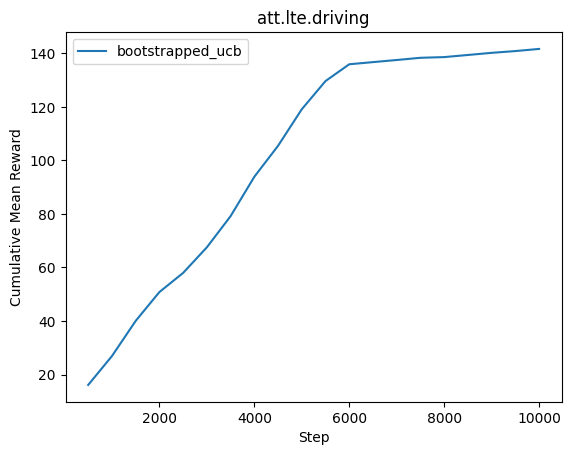

[17.121100000000002, 35.39840000000001, 50.4219, 63.6715, 76.1808, 87.82160000000002, 98.91660000000002, 109.67870000000003, 122.51190000000005, 134.20460000000003, 144.0079, 155.5633, 167.5349, 177.6248, 190.8092, 193.30450000000002, 194.09230000000002, 194.94180000000003, 195.78430000000003, 196.61460000000002]


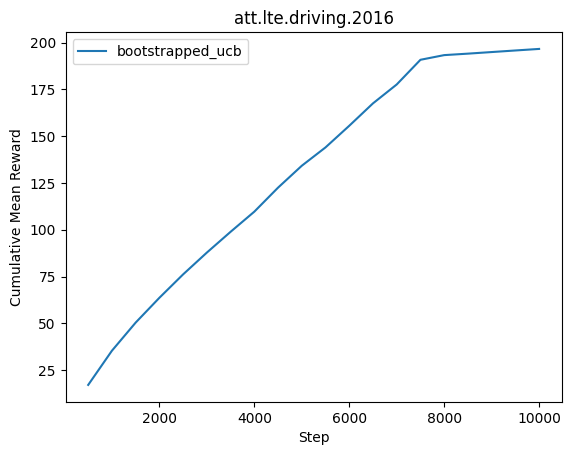

[27.917900000000017, 50.09850000000004, 70.35600000000005, 96.23830000000005, 126.44540000000009, 154.8498000000001, 173.2754000000001, 183.32470000000006, 184.02370000000008, 184.7972000000001, 185.5695000000001, 186.3616000000001, 187.18660000000008, 187.9684000000001, 188.6792000000001, 189.5079000000001, 190.34760000000009, 191.10940000000008, 191.9000000000001, 192.6869000000001]


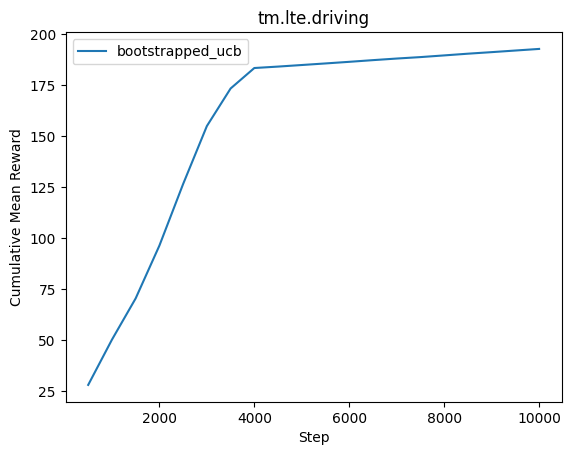

[41.54789999999998, 70.38189999999997, 98.8877, 127.926, 153.05769999999998, 180.98459999999997, 206.9903, 234.62669999999997, 264.0223, 292.6073, 316.75750000000005, 340.09800000000007, 343.2019, 344.2565, 345.3176, 346.3802, 347.4354, 348.48670000000004, 349.5561, 350.6343]


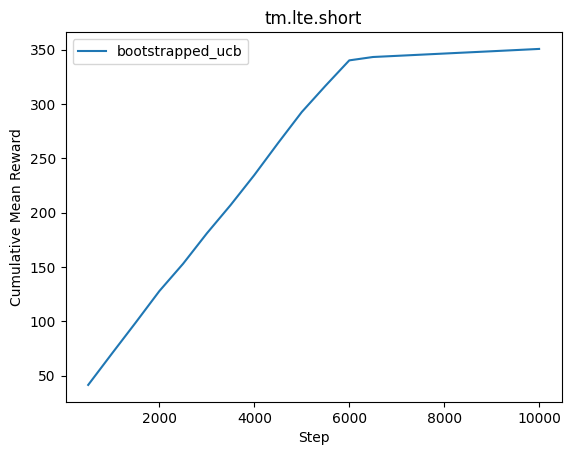

[11.019100000000007, 39.26120000000001, 64.4075, 85.36160000000001, 103.7528, 123.34899999999996, 146.62999999999997, 167.14339999999996, 186.80339999999995, 207.46439999999996, 219.00900000000004, 220.44110000000003, 221.8856, 223.3357, 224.7779, 226.17999999999998, 227.62999999999997, 229.07109999999994, 230.51949999999994, 231.96949999999993]


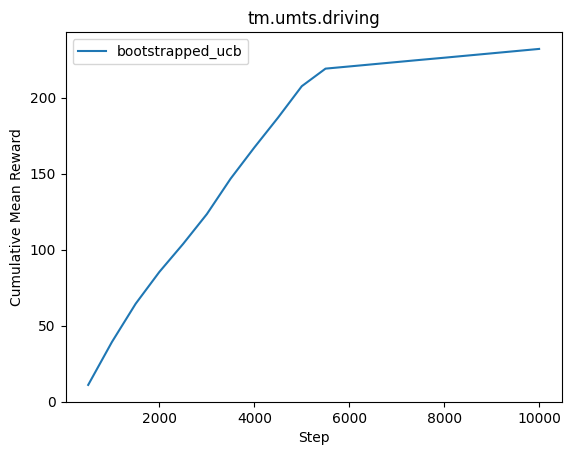

[25.53389999999999, 48.9161, 73.9794, 98.2738, 124.017, 151.27499999999998, 174.87209999999993, 177.21639999999994, 178.44449999999992, 179.37669999999991, 181.39469999999992, 183.3746999999999, 185.31479999999988, 187.41069999999988, 189.57839999999987, 191.53659999999985, 193.58659999999983, 195.70199999999983, 197.64349999999982, 199.31039999999982]


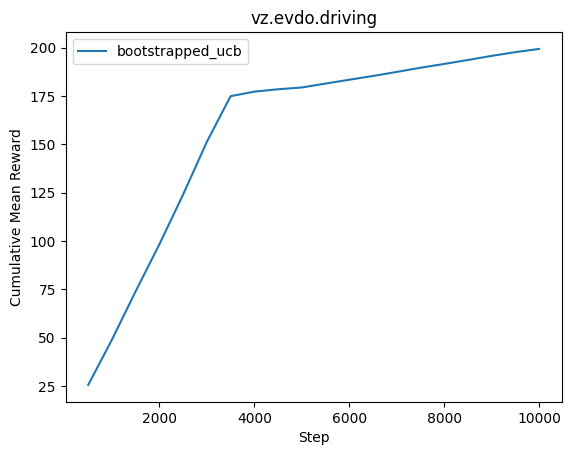

[17.80940000000012, 17.041800000000148, 20.372500000000176, 23.949100000000207, 27.349700000000233, 30.81790000000024, 34.357800000000246, 37.87440000000024, 41.44040000000024, 44.91940000000024, 48.30400000000024, 51.63470000000023, 55.18730000000023, 58.64170000000023, 62.14960000000022, 65.48160000000021, 69.06450000000021, 72.6220000000002, 76.0946000000002, 79.6088000000002]


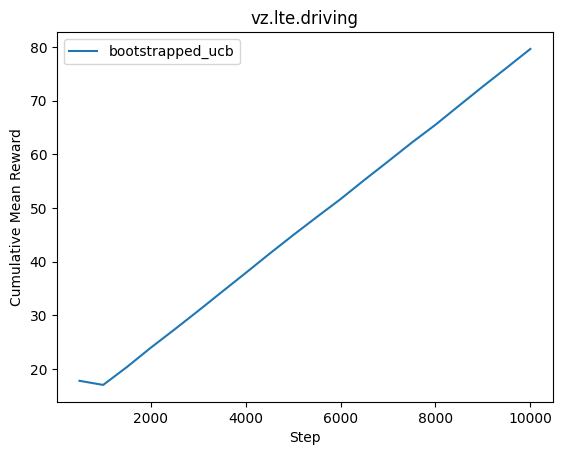

[22.1276, 43.47979999999998, 63.27449999999993, 59.82709999999987, 61.33099999999988, 63.097899999999896, 64.89019999999991, 66.69479999999993, 68.47219999999994, 70.27409999999996, 72.07519999999998, 73.89359999999999, 75.68220000000001, 77.47810000000003, 79.23770000000005, 80.77000000000005, 82.53170000000006, 83.89580000000005, 85.26880000000004, 86.61510000000004]


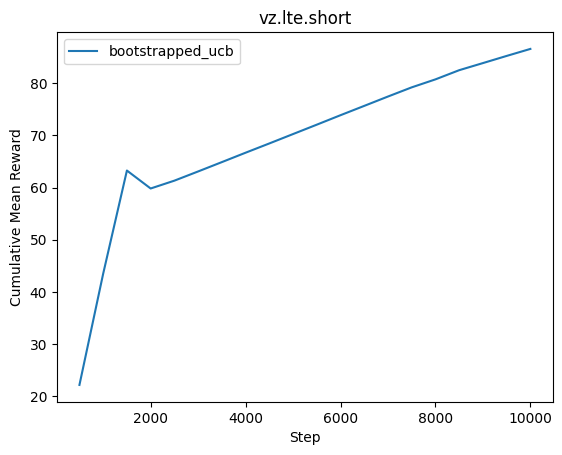

In [20]:
import matplotlib.pyplot as plt

from collections import defaultdict


# Group entries by trace key
grouped_dict = defaultdict(list)
for key, value in models_dict.items():
    # Remove this line to plot all the policies
    if key[0] == "bootstrapped_ucb":
        trace_key = key[1]
        grouped_dict[trace_key].append(value)

# Loop over traces and plot episode reward for each model
for trace_key, file_paths in grouped_dict.items():
    fig, ax = plt.subplots()
    for file_path in file_paths:
        with open(file_path, 'r') as f:
            data = json.load(f)
            model_name = file_path.split('/')[-1].split('.')[0]
            rewards = data['episode_reward']
            steps =  data["nb_steps"]
            episode_rewards = [sum(rewards[:i+1]) for i in range(len(rewards))]
            print(episode_rewards)
            ax.plot(steps, episode_rewards, label=model_name)
    ax.set_xlabel('Step')
    ax.set_ylabel('Cumulative Mean Reward')
    ax.set_title(trace_key)
    ax.legend()
    plt.show()
